In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
test_data = pd.read_csv("data/test.csv")

In [5]:
data = data.T
display(data)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data = test_data.T
display(test_data)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data_array = np.array(data)

test = data_array[0:4200,:]
train = data_array[4200:,:]

In [9]:
test_data_array = np.array(test_data)

In [10]:
test_data_array = test_data_array / 255.0

In [11]:
test_y = test[:,0]
train_y = train[:,0]

test_x = test[:,1:785] / 255.0
train_x = train[:,1:785] / 255.0

In [12]:
def ReLU(x):
    return np.maximum(0, x)

def leaky_relu(Z, alpha=0.02):
    return np.where(Z > 0, Z, alpha * Z)

def leaky_relu_deriv(Z, alpha=0.02):
    return np.where(Z > 0, 1, alpha)

def softmax(x):
    x_stable = x - np.max(x, axis=0, keepdims=True)
    exps = np.exp(x_stable)
    return exps / np.sum(exps, axis=0, keepdims=True)

In [13]:
np.random.seed(2)
W1 = np.random.randn(64, 784) * np.sqrt(2 / 784)
b1 = np.zeros((64, 1))
W2 = np.random.randn(64, 64) * np.sqrt(2 / 64)
b2 = np.zeros((64, 1))
W3 = np.random.randn(32, 64) * np.sqrt(2 / 64)
b3 = np.zeros((32, 1))
W4 = np.random.randn(10, 32) * np.sqrt(2 / 32)
b4 = np.zeros((10, 1))

In [ ]:
    keep_prob = 0.8      # Dropout keep probability (tuneable)
    l2_lambda = 0.001    # L2 regularization strength (tuneable)


In [15]:
def learn(X, Y, W1, b1, W2, b2, W3, b3, W4, b4, lr, iterations, shuffle_interval, beta1=0.9, beta2=0.999, epsilon=1e-8):
    train_x = X
    train_y = Y
    m = train_x.shape[0]
    indices = np.arange(train_x.shape[0])
    
    keep_prob = 0.8
    l2_lambda = 0.001
    
    adam_vars = {}
    for name, param in zip(
        ['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'],
        [W1, b1, W2, b2, W3, b3, W4, b4]
    ):
        adam_vars[f"m{name}"] = np.zeros_like(param)
        adam_vars[f"v{name}"] = np.zeros_like(param)

    for it in range(1, iterations + 1):

        if it % shuffle_interval == 0:
            np.random.shuffle(indices)

        train_x_ = train_x[indices]
        train_y_ = train_y[indices]

        A0 = train_x_.T

        # === Forward ===
        Z1 = np.dot(W1, A0) + b1
        A1 = leaky_relu(Z1)
        D1 = (np.random.rand(*A1.shape) < keep_prob) / keep_prob  # Dropout mask
        A1 *= D1

        Z2 = np.dot(W2, A1) + b2
        A2 = leaky_relu(Z2)
        D2 = (np.random.rand(*A2.shape) < keep_prob) / keep_prob
        A2 *= D2

        Z3 = np.dot(W3, A2) + b3
        A3 = leaky_relu(Z3)
        D3 = (np.random.rand(*A3.shape) < keep_prob) / keep_prob
        A3 *= D3

        Z4 = np.dot(W4, A3) + b4
        A4 = softmax(Z4)

        # Accuracy
        Y_pred = np.argmax(A4, axis=0)
        correct = np.sum(Y_pred == train_y_)
        accuracy = correct / m * 100

        # One-hot
        Y_onehot = np.zeros((10, m))
        Y_onehot[train_y_, np.arange(m)] = 1

        # === Backward ===
        dZ4 = A4 - Y_onehot
        dW4 = (1/m) * np.dot(dZ4, A3.T) + l2_lambda * W4
        db4 = (1/m) * np.sum(dZ4, axis=1, keepdims=True)

        dA3 = np.dot(W4.T, dZ4)
        dA3 *= D3
        dZ3 = dA3 * leaky_relu_deriv(Z3)
        dW3 = (1/m) * np.dot(dZ3, A2.T) + l2_lambda * W3
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        dA2 = np.dot(W3.T, dZ3)
        dA2 *= D2
        dZ2 = dA2 * leaky_relu_deriv(Z2)
        dW2 = (1/m) * np.dot(dZ2, A1.T) + l2_lambda * W2
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dA1 *= D1
        dZ1 = dA1 * leaky_relu_deriv(Z1)
        dW1 = (1/m) * np.dot(dZ1, A0.T) + l2_lambda * W1
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # === Adam ===
        for name, dparam, param in zip(
            ['W1','b1','W2','b2','W3','b3','W4','b4'],
            [dW1, db1, dW2, db2, dW3, db3, dW4, db4],
            [W1, b1, W2, b2, W3, b3, W4, b4]
        ):
            m_prev = adam_vars[f"m{name}"]
            v_prev = adam_vars[f"v{name}"]

            m_new = beta1 * m_prev + (1 - beta1) * dparam
            v_new = beta2 * v_prev + (1 - beta2) * (dparam ** 2)

            m_hat = m_new / (1 - beta1 ** it)
            v_hat = v_new / (1 - beta2 ** it)

            param -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

            adam_vars[f"m{name}"] = m_new
            adam_vars[f"v{name}"] = v_new

        if it % 10 == 0:
            print(f"Iter {it} | Train Acc: {accuracy:.2f}%")

    return W1, b1, W2, b2, W3, b3, W4, b4

In [16]:
W1, b1, W2, b2, W3, b3, W4, b4 = learn(train_x, train_y, W1, b1, W2, b2, W3, b3, W4, b4, 0.01, 1000,3)

Iter 10 | Train Acc: 66.01%
Iter 20 | Train Acc: 83.54%


KeyboardInterrupt: 

In [147]:
# Input Layer
m = test_x.shape[0]

A0 = test_x.T

Z1 = np.dot(W1, A0) + b1
A1 = leaky_relu(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = leaky_relu(Z2)

Z3 = np.dot(W3, A2) + b3
A3 = leaky_relu(Z3)

Z4 = np.dot(W4, A3) + b4
A4 = softmax(Z4)

# Output Layer

Y_predicted = np.argmax(A4, axis=0)
correct = np.sum(Y_predicted == test_y)
accuracy = correct / m * 100

In [148]:
print(accuracy)

96.21428571428572


In [149]:
def shuffle_test_data(test_x, test_y):
    indices = np.random.permutation(test_x.shape[0])
    test_x = test_x[indices]
    test_y = test_y[indices]
    return test_x, test_y

In [150]:
test_x_, test_y_ = shuffle_test_data(test_x,test_y)

In [176]:
# Input Layer
m = test_x_.shape[0]

A0_ = test_x_.T

Z1_ = np.dot(W1, A0_) + b1
A1_ = leaky_relu(Z1_)

Z2_ = np.dot(W2, A1_) + b2
A2_ = leaky_relu(Z2_)

Z3_ = np.dot(W3, A2_) + b3
A3_ = leaky_relu(Z3_)

Z4_ = np.dot(W4, A3_) + b4
A4_ = softmax(Z4_)

# Output Layer

Y_predicted_ = np.argmax(A4_, axis=0)
correct_ = np.sum(Y_predicted_ == test_y_)
accuracy_ = correct_ / m * 100

In [177]:
print(accuracy_)

96.21428571428572


In [172]:
def test_prediction(index,showImage = False):
    current_image = test_data_array[index,:].reshape((28,28)) * 255
    true_label = "picture"
    predicted_label = Y_predicted_[index]
    print(f"The number is {true_label} and the model predicted {predicted_label}.\n\n")
    if showImage:
        plt.imshow(current_image,interpolation="nearest")

The number is picture and the model predicted 0.


The number is picture and the model predicted 0.


The number is picture and the model predicted 9.


The number is picture and the model predicted 0.


The number is picture and the model predicted 3.


The number is picture and the model predicted 8.


The number is picture and the model predicted 1.


The number is picture and the model predicted 6.


The number is picture and the model predicted 5.




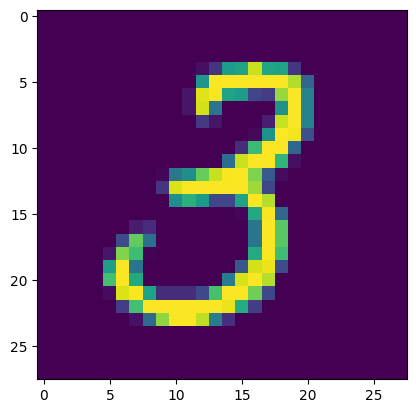

In [ ]:
test_prediction(134)
test_prediction(1)
test_prediction(999)
test_prediction(560)
test_prediction(561)
test_prediction(562)
test_prediction(563) # wrong prediction
test_prediction(564)
test_prediction(565)